# Project Hotel

Business problem:

To build a recommendation system for the hotel industry to examine where each hotel brand stands as compared to its competition. Unlike, other recommendation system this aims are targeting the hotel managers and stakeholder to better understand their industry and gain a competitive edge. Along with recommendation techniques, various clustering and dimensionality techniques were used to bring insight.

### Import libraries

In [510]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option("display.max_columns",None)

###   Reading Files 

In [511]:
df_details = pd.read_csv('Hotel_details.csv') # loading file 

In [512]:
df_details.head()

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
0,46406,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,2,https://www.booking.com/hotel/hr/bungalow-luxu...,EUR
1,46407,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,5,https://www.agoda.com/en-gb/hotel-polonia/hote...,EUR
2,46408,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,2,http://www.booking.com/hotel/it/rifugio-sass-b...,EUR
3,46409,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,5,https://www.agoda.com/en-gb/madalena-hotel/hot...,EUR
4,46410,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,2,http://www.booking.com/hotel/it/pension-morenf...,EUR


In [513]:
df_details.drop(['Source','id','url'],axis=1,inplace=True) # deleting scrap variables

In [514]:
df_formula= pd.read_csv("hotel_price_min_max - Formula.csv") # loading files
df_room_attributes=  pd.read_csv('Hotel_Room_attributes.csv')
df_room_price = pd.read_csv("hotels_RoomPrice.csv")  # sincel files price and attributes are almost similar so we will use only price

In [515]:
print(df_details.shape)
print(df_formula.shape)
print(df_room_attributes.shape)
print(df_room_price.shape)

(108048, 11)
(9094, 6)
(165873, 5)
(165873, 30)


# 1. Data Cleaning

In [516]:
df_details.rename(columns={'hotelid':'hotelcode'},inplace=True) # renaming hoteld id with hotelcode to make sure that column hotelcode is same everywhere

### a. Merging files

In [517]:
merge1=pd.merge(df_details,df_formula[['hotelcode','Score','min','max']],on='hotelcode',how='inner')
merge1.shape  # checking the shape of merged files

(9665, 14)

In [518]:
final= pd.merge(merge1,df_room_price[['hotelcode','onsiterate','netrate','roomtype','ratetype','currency','guests','maxoccupancy'
         ,'discount','taxstatus','taxtype','ispromo'  ,'ratedescription' ,'roomamenities','israteperstay']]                     
                ,on='hotelcode',how='inner')  # merging relevant columns only
final.shape  # shape of finally merged files

(181426, 28)

In [519]:
final.head()  

,hotelcode,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,curr,Score,min,max,onsiterate,netrate,roomtype,ratetype,currency,guests,maxoccupancy,discount,taxstatus,taxtype,ispromo,ratedescription,roomamenities,israteperstay
0,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053.0,Hotels,4,35.242699,25.728689,EUR,0.28,49.08,245.36,59.59,141.16,Double Room with Sea View,Extra low price! (non-refundable),USD,1,1,57.79,2,"City tax $ 0.30, Government Tax (Pay at the pr...",Y,"Room size: 35 m²/377 ft², Shower, 2 single bed...",Air conditioning: ;Coffee/tea maker: ;Desk: ;F...,Y
1,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053.0,Hotels,4,35.242699,25.728689,EUR,0.28,49.08,245.36,49.08,89.07,Double Room with Garden View,Extra low price! (non-refundable),USD,1,1,44.90,2,"City tax $ 0.24, Government Tax (Pay at the pr...",Y,"Room size: 30 m²/323 ft², Shower, 1 double bed",Air conditioning: ;Free Wi-Fi in all rooms!: ;...,Y
2,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053.0,Hotels,4,35.242699,25.728689,EUR,0.28,49.08,245.36,54.53,89.07,Double Room with Garden View,"Cancellation policy, Pay at the hotel",USD,1,1,38.78,2,"City tax $ 0.28, Government Tax (Pay at the pr...",Y,"Room size: 30 m²/323 ft², Shower, 1 double bed",Air conditioning: ;Free Wi-Fi in all rooms!: ;...,Y
3,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053.0,Hotels,4,35.242699,25.728689,EUR,0.28,49.08,245.36,59.59,89.07,Double Room with Garden View,Extra low price! (non-refundable),USD,1,1,33.10,2,"City tax $ 0.30, Government Tax (Pay at the pr...",Y,"Room size: 30 m²/323 ft², Shower, 1 double bed",Air conditioning: ;Free Wi-Fi in all rooms!: ;...,Y
4,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053.0,Hotels,4,35.242699,25.728689,EUR,0.28,49.08,245.36,61.33,89.07,Double Room with Garden View,Extra low price! (non-refundable),USD,1,2,31.14,2,"City tax $ 0.31, Government Tax (Pay at the pr...",Y,"Room size: 30 m²/323 ft², Shower, 1 double bed",Air conditioning: ;Free Wi-Fi in all rooms!: ;...,Y


### b. Checking null values

In [520]:
100*final.isnull().sum() /len(final)# null values are present in the data

hotelcode           0.000000
hotelname           0.000000
address             0.318036
city                0.000000
country             0.000000
zipcode            47.814536
propertytype        0.000000
starrating          0.000000
latitude            0.000000
longitude           0.000000
curr                0.000000
Score               0.000000
min                 0.000000
max                 0.000000
onsiterate          0.000000
netrate             0.000000
roomtype            0.000000
ratetype            2.924057
currency            0.000000
guests              0.000000
maxoccupancy        0.000000
discount            0.000000
taxstatus           0.000000
taxtype             4.940306
ispromo             0.000000
ratedescription     2.924057
roomamenities       2.924057
israteperstay       0.000000
dtype: float64

There are null values present in the ratetype, taxtype, ratediscription, roomamenities, zipcode and  address

### c. Checking duplicated rows and dropping these

In [521]:
final.duplicated().sum() # duplicated rows are there in the file

4520

In [522]:
final.drop_duplicates(subset='hotelcode',inplace=True)

In [523]:
final.drop_duplicates(inplace=True) # dropping duplicated rows

In [524]:
final.reset_index(inplace=True)

In [525]:
final.drop('index',axis=1,inplace=True)

In [526]:
final.duplicated().sum()  # checking if there is any duplicated values there or not after treatment

0

In [527]:
final.info() # checking the data type for necessary conversion if required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hotelcode        9093 non-null   int64  
 1   hotelname        9093 non-null   object 
 2   address          8665 non-null   object 
 3   city             9093 non-null   object 
 4   country          9093 non-null   object 
 5   zipcode          4866 non-null   float64
 6   propertytype     9093 non-null   object 
 7   starrating       9093 non-null   int64  
 8   latitude         9093 non-null   float64
 9   longitude        9093 non-null   float64
 10  curr             9093 non-null   object 
 11  Score            9093 non-null   float64
 12  min              9093 non-null   float64
 13  max              9093 non-null   float64
 14  onsiterate       9093 non-null   float64
 15  netrate          9093 non-null   float64
 16  roomtype         9093 non-null   object 
 17  ratetype      

In [528]:
final['zipcode'] = final['zipcode'].astype(object)  # converting zipcode into object

### d. Replacing null values with category naming as other

In [529]:
final['address'] = final['address'].fillna(value='Other')
final['zipcode'] = final['zipcode'].fillna(value='Other')
final['ratetype'] = final['ratetype'].fillna(value="Other")
final['ratedescription'] = final['ratedescription'].fillna(value="Other")
final['roomamenities'] = final['roomamenities'].fillna(value="Other")
final['taxtype'] = final['taxtype'].fillna(value="Other")

In [530]:
final.shape

(9093, 28)

### e. Extracting information from the columns ( roomtype, ratedescription)

In [531]:
final['Room size']=final['ratedescription'].str.split(',')

In [532]:
final['Room size']=final['Room size'].apply(lambda x: x[0])

In [533]:
final['Room size']=final['Room size'].replace(['Free Wi-Fi','Shower','Free Breakfast','Other','Non-smoking','Shower and bathtub',
'Balcony/terrace','Separate shower/bathtub','Free breakfast for {0}','Pay at the hotel','Bathtub','Street view','City view',
'Extra low price! (non-refundable)','2 bathrooms','Free Breakfast for 1','Garden view','Shared bathroom','Pay nothing until October 23',
'Sea view','Pay nothing until December 21','Nature view','Pay nothing until October 16','Pay nothing until December 6'],'Others')

In [534]:
final['Room size']=final['Room size'].replace(['Pay nothing until December 4','Pay nothing until November 8','Pay nothing until November 13','Pay nothing until October 15','Pay nothing until November 23','Pay nothing until October 26','Pay nothing until October 29','Pay nothing until December 7','Pay nothing until October 31','Pay nothing until November 24','Pay nothing until October 19','Pay nothing until November 9','Pay nothing until November 19','Kitchenette','3 bathrooms','Courtyard view','Pay nothing until January 2','Pay nothing until October 30','7 bathrooms','Book without credit card','Smoking allowed','Free cancellation before October 25',
'6 bathrooms','Lake view','Pay nothing until January 7','3 bedrooms','Free WiFi','4 bedrooms','Pay nothing until December 27','Ocean view'],'Others')

In [535]:
final['Room size']=final['Room size'].replace(['Pay nothing until December 10','Pay nothing until November 16','Pay nothing until November 11','Pay nothing until November 18','Pay nothing until December 16','Pay nothing until November 17',
'No Windows view','Pay nothing until November 14','Pay nothing until November 21','Pay nothing until November 27','Pay nothing until December 19','Pay nothing until January 4','Pay nothing until January 3','Pay nothing until November 29','Pay nothing until November 10',
'Pay nothing until November 28','Pay nothing until January 1','Pay nothing until December 5','Pay nothing until December 17','Pay nothing until November 12','Pay nothing until October 17','2 bedrooms','Pool view','Mountain view','Cancellation policy','Pay nothing until November 1'],'Others')

In [536]:
final['Room size']=final['Room size'].replace(['Beach view','Partial sea view','Private pool','All Inclusive','Pay nothing until December 26','4 bathrooms','5 bathrooms','Pay nothing until December 23','Pay nothing until November 22','Pay nothing until December 25','Pay nothing until October 27','Pay nothing until December 13','Pay nothing until October 24','Pay nothing until October 22','Pay nothing until December 15','Pay nothing until December 22','Pay nothing until November 6','Pay nothing until December 9','Pay nothing until November 4','Pay nothing until October 18','Pay nothing until October 20','Pay nothing until November 20','Pay nothing until December 11 ','Pay nothing until December 29'],'Others')

In [537]:
final['Room size']=final['Room size'].replace(['Country/region view','Pay nothing until December 24','Park view','Pay nothing until November 25','Pay nothing until December 8','Pay nothing until October 25','Pay nothing until December 1','Pay nothing until December 31','River view'],'Others')

In [538]:
final['Room size']=final['Room size'].replace(['Pay nothing until December 11','Pay nothing until October 28','Pay nothing until December 30','Pay nothing until December 18'],'Others')

In [539]:
final['Room size']=final['Room size'].replace(['Pay nothing until November 26','Pay nothing until December 28','Pay nothing until November 15'
'Pay nothing until December 2','Pay nothing until November 7','Pay nothing until October 14','Pay nothing until December 3','Pay nothing until November 5 ',
'Pay nothing until December 14 ','Pay nothing until December 20','Pay nothing until January 5','Pay nothing until December 12','Pay nothing until November 30',
'Pay nothing until October 21','Pay nothing until October 13','Pay nothing until November 3'],'Others')

In [540]:
final.head()

,hotelcode,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,curr,Score,min,max,onsiterate,netrate,roomtype,ratetype,currency,guests,maxoccupancy,discount,taxstatus,taxtype,ispromo,ratedescription,roomamenities,israteperstay,Room size
0,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053,Hotels,4,35.242699,25.728689,EUR,0.28,49.08,245.36,59.59,141.16,Double Room with Sea View,Extra low price! (non-refundable),USD,1,1,57.79,2,"City tax $ 0.30, Government Tax (Pay at the pr...",Y,"Room size: 35 m²/377 ft², Shower, 2 single bed...",Air conditioning: ;Coffee/tea maker: ;Desk: ;F...,Y,Room size: 35 m²/377 ft²
1,177240,Maistrali Hotel,Tragaki Beach,Zakynthos Island,Greece,29100,Hotels,2,37.826958,20.841570,EUR,0.35,58.53,77.58,58.53,0.00,Double Capacity 2,Cancellation policy,USD,1,1,0.00,2,Tax 13%,N,"Free Breakfast, Free Wi-Fi, Cancellation policy",Air conditioning: ;Free Wi-Fi in all rooms!: ;...,Y,Others
2,177242,Margarita Hotel,Main Street,Santorini,Greece,84700,Hotels,2,36.425270,25.429930,EUR,0.12,63.29,213.24,63.29,0.00,Double or Twin Room,Extra low price! (non-refundable),USD,1,2,0.00,2,"City tax $ 0.32, Government Tax (Pay at the pr...",N,"Room size: 17 m²/183 ft², Balcony/terrace, Sho...",Air conditioning: ;Closet: ;Desk: ;Free Wi-Fi ...,Y,Room size: 17 m²/183 ft²
3,177255,Sellada Beach Hotel,Perissa,Santorini,Greece,84703,Hotels,4,36.353432,25.472145,EUR,0.16,86.61,148.98,86.61,0.00,Double,Extra low price! (non-refundable),USD,1,1,0.00,2,Tax 13%,N,"Room size: 18 m²/194 ft², Pool view, Balcony/t...",Air conditioning: ;Closet: ;Clothes rack: ;Cof...,Y,Room size: 18 m²/194 ft²
4,177408,Hotel Krone,Rainerstrasse 1,Mondsee,Austria,5310,Hotels,4,47.855227,13.350021,EUR,0.34,45.71,115.28,65.30,0.00,Twin Room,"FREE cancellation, Pay at the hotel",USD,1,1,0.00,2,"City tax (Pay at the property) $ 1.33, VAT $ 6.53",N,"Room size: 11 m²/118 ft², Street view, Non-smo...",Air conditioning: ;Blackout curtains: ;Carpeti...,Y,Room size: 11 m²/118 ft²


In [541]:
final=final.drop(['ratedescription'],axis=1) # as relevant information has been taken out, so dropping the ratedescription now

In [542]:
room_amenities = final['roomamenities'].str.get_dummies(sep=';')
room_amenities = room_amenities[['Air conditioning: ','Coffee/tea maker: ','Wi-Fi [free]: ','Toiletries: ']]

In [543]:
room_amenities.head()

,Air conditioning:,Coffee/tea maker:,Wi-Fi [free]:,Toiletries:
0,1,1,0,1
1,1,0,0,0
2,1,0,0,1
3,1,1,0,1
4,1,1,0,1


In [544]:
hotel_data = pd.concat([final, room_amenities], axis=1)

In [545]:
hotel_data=hotel_data.drop(['roomamenities'],axis=1) # dropping roomameities as relevant ifnformation has been taken out from it

In [546]:
hotel_data.head()

,hotelcode,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,curr,Score,min,max,onsiterate,netrate,roomtype,ratetype,currency,guests,maxoccupancy,discount,taxstatus,taxtype,ispromo,israteperstay,Room size,Air conditioning:,Coffee/tea maker:,Wi-Fi [free]:,Toiletries:
0,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053,Hotels,4,35.242699,25.728689,EUR,0.28,49.08,245.36,59.59,141.16,Double Room with Sea View,Extra low price! (non-refundable),USD,1,1,57.79,2,"City tax $ 0.30, Government Tax (Pay at the pr...",Y,Y,Room size: 35 m²/377 ft²,1,1,0,1
1,177240,Maistrali Hotel,Tragaki Beach,Zakynthos Island,Greece,29100,Hotels,2,37.826958,20.841570,EUR,0.35,58.53,77.58,58.53,0.00,Double Capacity 2,Cancellation policy,USD,1,1,0.00,2,Tax 13%,N,Y,Others,1,0,0,0
2,177242,Margarita Hotel,Main Street,Santorini,Greece,84700,Hotels,2,36.425270,25.429930,EUR,0.12,63.29,213.24,63.29,0.00,Double or Twin Room,Extra low price! (non-refundable),USD,1,2,0.00,2,"City tax $ 0.32, Government Tax (Pay at the pr...",N,Y,Room size: 17 m²/183 ft²,1,0,0,1
3,177255,Sellada Beach Hotel,Perissa,Santorini,Greece,84703,Hotels,4,36.353432,25.472145,EUR,0.16,86.61,148.98,86.61,0.00,Double,Extra low price! (non-refundable),USD,1,1,0.00,2,Tax 13%,N,Y,Room size: 18 m²/194 ft²,1,1,0,1
4,177408,Hotel Krone,Rainerstrasse 1,Mondsee,Austria,5310,Hotels,4,47.855227,13.350021,EUR,0.34,45.71,115.28,65.30,0.00,Twin Room,"FREE cancellation, Pay at the hotel",USD,1,1,0.00,2,"City tax (Pay at the property) $ 1.33, VAT $ 6.53",N,Y,Room size: 11 m²/118 ft²,1,1,0,1


In [547]:
hotel_data.shape

(9093, 31)

In [548]:
df_hotel = hotel_data.copy() # making copy of hotel_data as df_hotel data would be used for manipulation and orinial data can be used for any inofrmation when needed

In [444]:
df_hotel.describe(include=object)

,hotelname,address,city,country,zipcode,propertytype,curr,roomtype,ratetype,currency,taxtype,ispromo,israteperstay,Room size
count,9093,9093,9093,9093,9093,9093,9093,9093,9093,9093,9093,9093,9093,9093
unique,8913,8436,4571,29,3272,7,8,1778,185,1,3543,2,2,99
top,Hotel Europa,Other,London,United Kingdom,Other,Hotels,EUR,Single Room,Extra low price! (non-refundable),USD,Other,N,Y,Others
freq,8,428,378,3412,4227,8975,5379,1134,3750,9093,952,6586,8900,2310


In [549]:
df_hotel.drop(columns =['hotelcode','hotelname','address','city','country','zipcode','roomtype','ratetype','currency','taxtype','Room size'],axis=1,inplace=True)

In [550]:
df_hotel.drop(columns=['guests'],axis=1,inplace=True)

In [551]:
df_hotel.head()

,propertytype,starrating,latitude,longitude,curr,Score,min,max,onsiterate,netrate,maxoccupancy,discount,taxstatus,ispromo,israteperstay,Air conditioning:,Coffee/tea maker:,Wi-Fi [free]:,Toiletries:
0,Hotels,4,35.242699,25.728689,EUR,0.28,49.08,245.36,59.59,141.16,1,57.79,2,Y,Y,1,1,0,1
1,Hotels,2,37.826958,20.841570,EUR,0.35,58.53,77.58,58.53,0.00,1,0.00,2,N,Y,1,0,0,0
2,Hotels,2,36.425270,25.429930,EUR,0.12,63.29,213.24,63.29,0.00,2,0.00,2,N,Y,1,0,0,1
3,Hotels,4,36.353432,25.472145,EUR,0.16,86.61,148.98,86.61,0.00,1,0.00,2,N,Y,1,1,0,1
4,Hotels,4,47.855227,13.350021,EUR,0.34,45.71,115.28,65.30,0.00,1,0.00,2,N,Y,1,1,0,1


# 2.Statistical summary

In [552]:
df_hotel.drop(columns =['latitude','longitude','Air conditioning: ','Coffee/tea maker: ','Wi-Fi [free]: ','Toiletries: '],axis=1).describe(exclude=object)

,starrating,Score,min,max,onsiterate,netrate,maxoccupancy,discount,taxstatus
count,9093.000000,9093.000000,9093.000000,9093.000000,9093.000000,9093.000000,9093.000000,9093.000000,9093.000000
mean,3.267458,0.569761,106.083502,206.186462,111.516346,47.846670,1.555482,9.598512,1.936325
std,0.662251,1.607877,172.404675,459.051478,144.172538,160.683976,1.103292,19.353112,0.432426
min,2.000000,0.000000,10.160000,11.800000,0.000000,0.000000,1.000000,0.000000,-1.000000
25%,3.000000,0.200000,55.010000,95.780000,56.870000,0.000000,1.000000,0.000000,2.000000
50%,3.000000,0.310000,73.670000,137.270000,78.380000,0.000000,1.000000,0.000000,2.000000
75%,4.000000,0.470000,101.380000,210.970000,111.350000,62.000000,2.000000,7.400000,2.000000
max,4.000000,87.900000,10104.050000,18083.360000,4795.000000,11957.400000,17.000000,99.650000,2.000000


From the rating it can be observed that the mininum rating of hotels are 2 and maximum is 4 , after studying the quaritile range it is sure that 75% of the hotels posses the rating of 4 star but there is no hotel with 5 star rating


From the min and max price columns it is sure that the  mininum price of hotel is $10.16 and maximum can be around $18083 , the mean price for minprice is about  $87.51

The discount provided by the hotel may vary from 0 to 99.65% , however the mean discount is $14.5

In [553]:
df_hotel.head()

,propertytype,starrating,latitude,longitude,curr,Score,min,max,onsiterate,netrate,maxoccupancy,discount,taxstatus,ispromo,israteperstay,Air conditioning:,Coffee/tea maker:,Wi-Fi [free]:,Toiletries:
0,Hotels,4,35.242699,25.728689,EUR,0.28,49.08,245.36,59.59,141.16,1,57.79,2,Y,Y,1,1,0,1
1,Hotels,2,37.826958,20.841570,EUR,0.35,58.53,77.58,58.53,0.00,1,0.00,2,N,Y,1,0,0,0
2,Hotels,2,36.425270,25.429930,EUR,0.12,63.29,213.24,63.29,0.00,2,0.00,2,N,Y,1,0,0,1
3,Hotels,4,36.353432,25.472145,EUR,0.16,86.61,148.98,86.61,0.00,1,0.00,2,N,Y,1,1,0,1
4,Hotels,4,47.855227,13.350021,EUR,0.34,45.71,115.28,65.30,0.00,1,0.00,2,N,Y,1,1,0,1


# Data Visualization

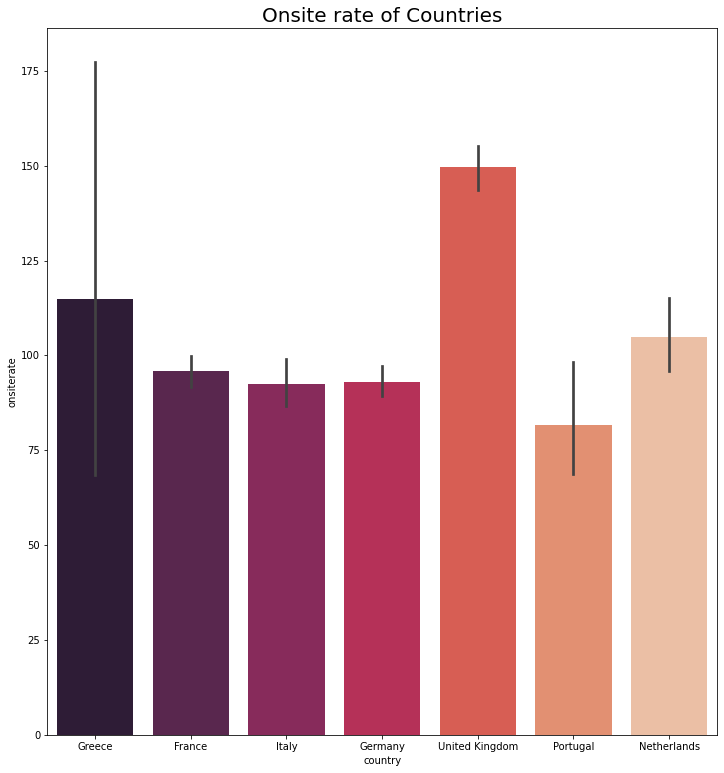

In [554]:
plt.figure(figsize=(12,13))
some_country = ('United Kingdom','Spain ','France', 'Italy', 'Germany', 'Portugal','Greece','Netherlands')
df_hotel = hotel_data.loc[hotel_data['country'].isin(some_country) & hotel_data['onsiterate'] ]

ax = sns.barplot(x=df_hotel['country'],y=df_hotel['onsiterate'], palette="rocket");
ax.set_title(label='Onsite rate of Countries', fontsize=20);

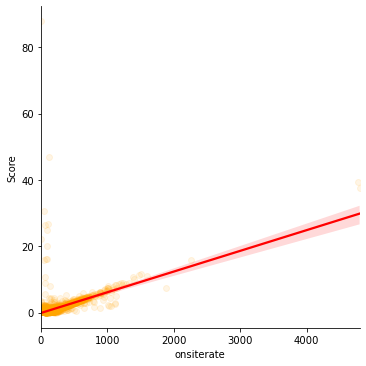

In [555]:
sns.lmplot(x = 'onsiterate', y ='Score', data = hotel_data,scatter_kws = {'alpha':0.1,'color':'orange'},
           line_kws={'color':'red'})
plt.show()

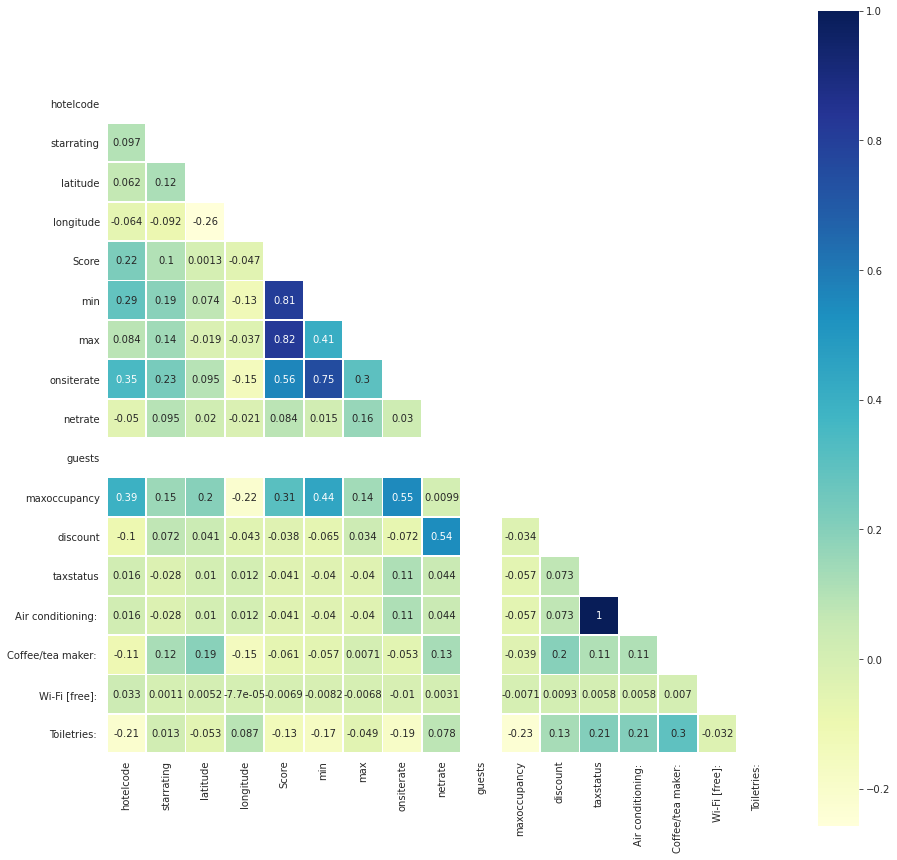

In [556]:
corr = hotel_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu",annot=True)

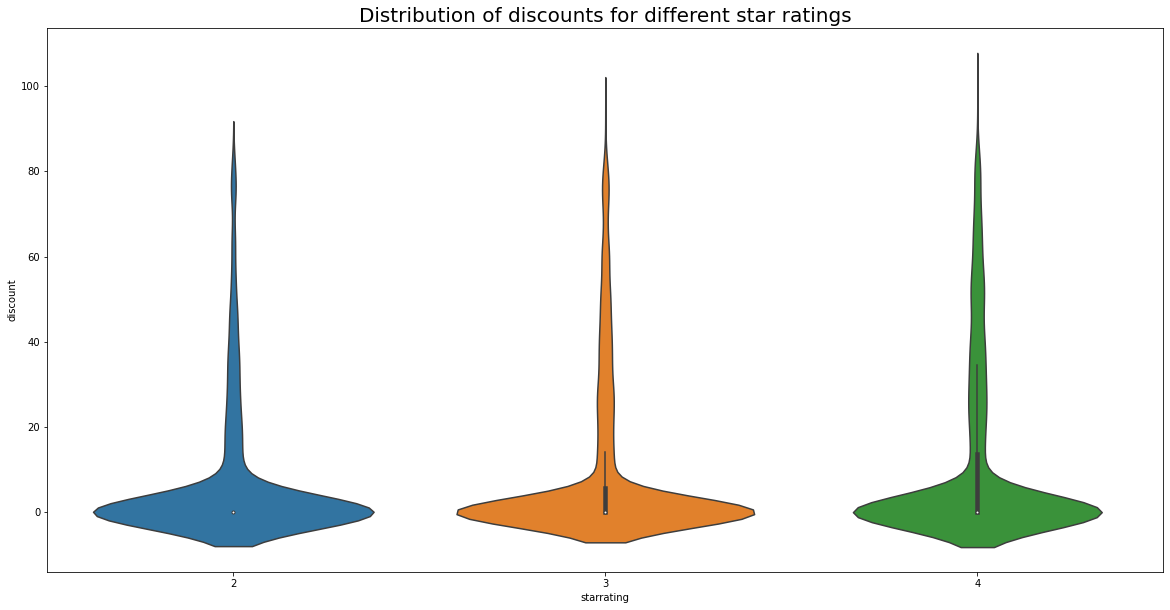

In [557]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.violinplot(x="starrating", y="discount", data=hotel_data);
ax.set_title(label='Distribution of discounts for different star ratings', fontsize=20);

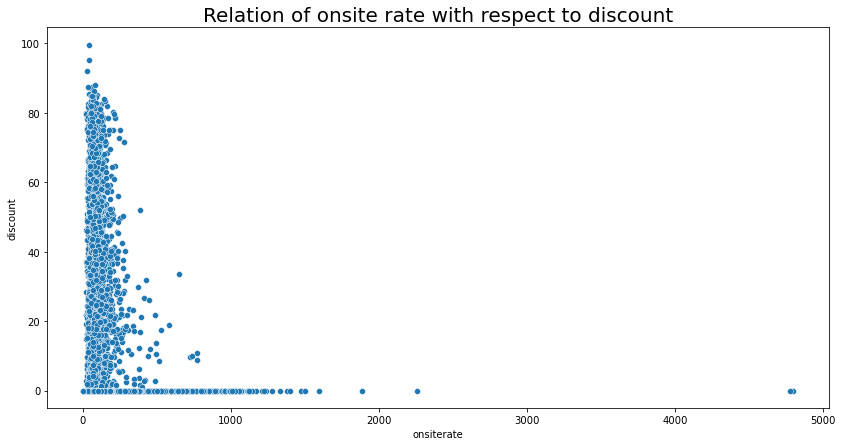

In [558]:
plt.figure(figsize=(14,7))
ax = sns.scatterplot(x='onsiterate', y='discount',
                     sizes=(1, 1),data=hotel_data)
ax.set_title(label='Relation of onsite rate with respect to discount', fontsize=20);

# Clustering

### a Flat clustering

In [377]:
df_hotel.size

213187

In [559]:
df_hotel =pd.get_dummies(df_hotel,columns=['propertytype','curr','taxstatus','ispromo','israteperstay','curr'],drop_first=True)

In [560]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from prince import MCA
from sklearn.pipeline import Pipeline

In [562]:
df_num.head()

,starrating,latitude,longitude,Score,min,max,onsiterate,netrate,maxoccupancy,discount
0,4,35.242699,25.728689,0.28,49.08,245.36,59.59,141.16,1,57.79
1,2,37.826958,20.841570,0.35,58.53,77.58,58.53,0.00,1,0.00
2,2,36.425270,25.429930,0.12,63.29,213.24,63.29,0.00,2,0.00
3,4,36.353432,25.472145,0.16,86.61,148.98,86.61,0.00,1,0.00
5,3,45.166756,1.543671,0.35,45.64,110.60,72.59,0.00,1,0.00


In [563]:
df_num =df_hotel.iloc[:,0:10]
df_num.head()

,hotelcode,hotelname,address,city,country,zipcode,starrating,latitude,longitude,Score
0,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053,4,35.242699,25.728689,0.28
1,177240,Maistrali Hotel,Tragaki Beach,Zakynthos Island,Greece,29100,2,37.826958,20.841570,0.35
2,177242,Margarita Hotel,Main Street,Santorini,Greece,84700,2,36.425270,25.429930,0.12
3,177255,Sellada Beach Hotel,Perissa,Santorini,Greece,84703,4,36.353432,25.472145,0.16
5,177420,Kyriad Brive la Gaillarde Centre,13 Avenue Jacques et Bernadette CHIRAC,Brive-la-Gaillarde,France,19100,3,45.166756,1.543671,0.35


In [564]:
pca =PCA()
pca.fit(df_num)

ValueError: could not convert string to float: 'Elounda Ilion Hotel'

In [565]:
cumsum =np.cumsum(pca.explained_variance_ratio_)
cumsum

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

Text(0, 0.5, 'Explained variance')

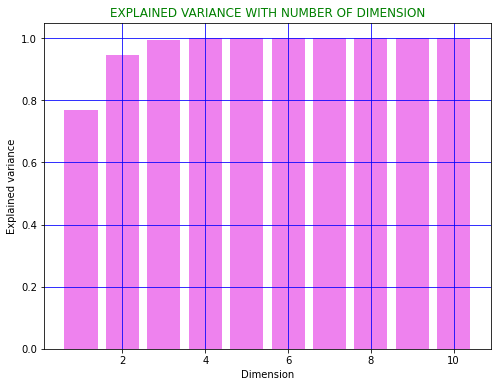

In [566]:
plt.figure(figsize=(8,6))
plt.bar(x=[i for i in range(1,11)],height=cumsum,color='violet')
plt.title("EXPLAINED VARIANCE WITH NUMBER OF DIMENSION",color='g')
plt.xlabel("Dimension")
plt.grid(True,color='blue')
plt.ylabel("Explained variance")

Grahp convey we need to select 4 dimensions in pca

In [567]:
pca =PCA(n_components=4)
X_num_pca =pca.fit_transform(df_num)

ValueError: could not convert string to float: 'Elounda Ilion Hotel'

In [392]:
df_cat = df_hotel.iloc[:,10:]
df_cat.head()

,Air conditioning:,Coffee/tea maker:,Wi-Fi [free]:,Toiletries:,propertytype_Holiday parks,propertytype_Hotels,propertytype_Inns,propertytype_Motels,propertytype_Resorts,curr_GBP,ispromo_Y,curr_GBP
0,1,1,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,1,0,1,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,0,0


In [393]:
df_cat.shape

(6877, 12)

In [394]:
mca =MCA(n_components=27)
mca.fit(df_cat)

MCA(n_components=27)

In [395]:
cumsum_cat =np.cumsum(np.array(mca.eigenvalues_)/sum(mca.eigenvalues_))
cumsum_cat  # at 22 we are almost getting 1

array([0.1918038 , 0.34355679, 0.4843198 , 0.6020664 , 0.71861615,
       0.82764642, 0.90484431, 0.9685675 , 0.99996696, 1.        ,
       1.        , 1.        ])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

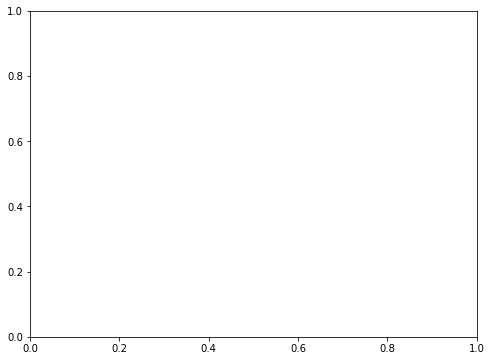

In [397]:
plt.figure(figsize=(8,6))
plt.bar(x=[i for i in range(1,28)],height=cumsum_cat,color='indigo')
plt.title("EXPLAINED VARIANCE WITH NUMBER OF DIMENSION",color='g')
plt.xlabel("Dimension")
plt.grid(True,color='blue')
plt.ylabel("Explained variance")

from the graph we can choose the dimension as 16 which almost give information about explained variance of  99.99 percent

In [398]:
mca =MCA(n_components=16)
X_cat_mca =mca.fit_transform(df_cat)

In [399]:
X_cat_mca.shape

(6877, 12)

In [400]:
X_cat_mca.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.000336,0.015396,-0.055544,0.422059,-0.351279,-0.071712,-0.513305,0.244740,0.099715,-0.000201,1.0,5.402029e-14
1,-0.002315,-0.050373,-0.065881,0.295655,-0.241968,-0.128587,0.610627,-0.430347,0.668621,0.000295,1.0,5.405295e-14
2,0.006350,-0.010732,-0.071801,0.417151,-0.371422,-0.147931,0.535082,-0.072272,-0.217846,-0.000439,1.0,5.406043e-14
3,-0.000978,0.013013,-0.049386,0.293424,-0.290166,-0.080382,0.169507,0.650413,0.140208,-0.000459,1.0,5.404149e-14
5,-0.002315,-0.050373,-0.065881,0.295655,-0.241968,-0.128587,0.610627,-0.430347,0.668621,0.000295,1.0,5.405295e-14


In [401]:
X_num_pca.shape

(6877, 4)

In [402]:
X_combined_mca_pca = np.column_stack((X_num_pca,X_cat_mca))  # stacking both pca and mca columns
X_combined_mca_pca.shape

(6877, 16)

In [403]:
scaler =MinMaxScaler()
Xs =scaler.fit_transform(X_combined_mca_pca)  #  scaling 

In [404]:
Xs.shape

(6877, 16)

### K means clustering

In [ ]:
from sklearn.cluster import KMeans
X = Xs
error = []

for k in range(1,30):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    error.append(kmeans.inertia_)
    
# Visualization of k values:
plt.figure(figsize=(10,8))
plt.plot(range(1,30), error, color='green')
plt.title('Elbow plot')
plt.xlabel('k values')
plt.ylabel('inertia values')
plt.grid(True)
plt.show()

Elbow plot shows that the value of k for cluster should be 9

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
from sklearn.cluster import KMeans
X = Xs
score = []

for k in range(2,30):
    kmeans = KMeans(n_clusters=k)
    label =kmeans.fit_predict(X)
    score.append(silhouette_score(X,label))
    
# Visualization of k values:
plt.figure(figsize=(10,8))
sns.barplot(x=[val for val in range(2,30)], y=score, color='green')
plt.title('Silhouette score vs clusters')
plt.xlabel('k values')
plt.ylabel('silhouette score')
plt.grid(True)
plt.show()

In [ ]:
#From both silhouette score and elbow plot we choose cluster's number=9

In [ ]:
kmeans = KMeans(n_clusters=9)
cluster =kmeans.fit_predict(Xs)

In [ ]:
df_hotel['clusterKmeans'] = cluster
df_hotel.head()

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x=df_hotel['clusterKmeans'])
plt.grid(True)
plt.show()

In [ ]:
df_hotel['price_average'] = (df_hotel['max']+df_hotel['min'])/2 # making average price with min and max price 

In [ ]:
df_hotel.groupby('clusterKmeans').describe()

In [ ]:
plt.figure(figsize=(10,8))
color_dict = dict({0:'brown',
                  1:'green',
                  2: 'orange',
                  3: 'red',
                   4: 'dodgerblue',
                  5:'yellow',
                  6:'blue',
                   7:'purple',
                   8:'magenta'
                  })
sns.scatterplot(data=df_hotel,x='price_average',y='discount',hue='clusterKmeans',palette=color_dict)
plt.show()

Most of the clusters discount varies widely and have price less than 1k but there are some which offer hardly no discount but there average price is very high

## Agglomerative clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

In [ ]:
linkage_ward =linkage(Xs,method='ward')  # ward dendogram 
plt.figure(figsize=(8,6))
dend =dendrogram(linkage_ward,p=10, truncate_mode='lastp')
plt.title("DENDOGRAM WITH WARD LINKAGE",color='violet')
plt.show()

In [ ]:
linkage_single=linkage(Xs,method='single')  # single dendogram 
plt.figure(figsize=(8,6))
dendrogram(linkage_single,p=10, truncate_mode='lastp')
plt.title("DENDOGRAM WITH SINGLE LINKAGE",color='violet')
plt.show()

In [ ]:
linkage_complete =linkage(Xs,method='complete')  # complete dendogram 
plt.figure(figsize=(8,6))
dend =dendrogram(linkage_complete,p=10, truncate_mode='lastp')
plt.title("DENDOGRAM WITH COMPLETE LINKAGE",color='violet')
plt.show()

In [ ]:
linkage_centroid =linkage(Xs,method='centroid')  # complete dendogram 
plt.figure(figsize=(8,6))
dend =dendrogram(linkage_centroid,p=10, truncate_mode='lastp')
plt.title("DENDOGRAM WITH CENTROID LINKAGE",color='violet')
plt.show()

In [ ]:
linkage_average =linkage(Xs,method='average')  # complete dendogram 
plt.figure(figsize=(8,6))
dend =dendrogram(linkage_average,p=10, truncate_mode='lastp')
plt.title("DENDOGRAM WITH AVERAGE LINKAGE",color='violet')
plt.show()

In [ ]:
# All dendogram convey that ward is best to form linkage with three clusters

In [ ]:
agg =AgglomerativeClustering(n_clusters=3)
cluster =agg.fit_predict(Xs)
df_hotel['clusteringAgglomerative']= cluster

In [ ]:
df_hotel.head()

In [ ]:
df_hotel.drop('clusterKmeans',axis=1).groupby('clusteringAgglomerative').describe()

In [ ]:
plt.figure(figsize=(10,8))
dic= {0:'green',
     1:'orange',
     2:'purple'}
sns.countplot(x=df_hotel['clusteringAgglomerative'],palette=dic)
plt.grid(True)
plt.title("AGGLOMERATIVE CLUSTERS COUNT",color='violet')
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
color_dict = dict({0:'brown',
                  1:'green',
                  2: 'orange',
                  })
sns.scatterplot(data=df_hotel,x='price_average',y='discount',hue='clusteringAgglomerative',palette=color_dict)
plt.title('Agglomerative clustering with discount and average price',color='violet')
plt.show()

The cluster patterns with 3 clusters in agglomerative and 9 clusters in k means is almost similar for discount and 
mean price

In [ ]:
plt.figure(figsize=(10,8))
color_dict = dict({0:'brown',
                  1:'yellow',
                  2: 'blue',
                  })
sns.stripplot(data=df_hotel,x='starrating',y='discount',hue='clusteringAgglomerative',palette=color_dict)
plt.title("Discount and mean price with star rating",color='violet')
plt.show()

The graph shows that all cluster belongs to either rating 3 and 4 , the density for rating 2 is less compare to other ratings which shows that most of the clusters have rating 3 and 4

# Density based clustering 

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
density = DBSCAN(eps = .5, min_samples =4)
density.fit(Xs)

In [ ]:
df_hotel['clusteringDensity'] = density.labels_

In [ ]:
df_hotel['clusteringDensity'].value_counts()

In [ ]:
plt.figure(figsize=(10,8))
color_dict = dict({0:'brown',
                  1:'green',
                  2: 'orange',
                  3: 'red',
                   4: 'dodgerblue',
                  5:'yellow',
                  6:'blue',
                   7:'purple',
                   -1:'magenta'
                  })
sns.countplot(x=df_hotel['clusteringDensity'],palette=color_dict)
plt.grid(True)
plt.title("DENSITY BASED CLUSTERS COUNT",color='violet')
plt.show()

The density based clustering does not suits this data, it should be neglected as the one cluster get almost all dataset while other are getting very less

# Dealing with K medoids

In [ ]:
from sklearn_extra.cluster import KMedoids

In [ ]:
X = Xs
error = []

for k in range(1,10):
    kmed = KMedoids(n_clusters=k)
    kmed.fit(X)
    error.append(kmed.inertia_)
    
# Visualization of k values:
plt.figure(figsize=(10,8))
plt.plot(range(1,10), error, color='green',marker='*')
plt.title('Elbow plot for K medoids')
plt.xlabel('k values')
plt.ylabel('inertia values')
plt.grid(True)
plt.show()

In [ ]:
kmedoids_model = KMedoids(n_clusters=8).fit(Xs)
df_hotel['clusteringKmedoids']=kmedoids_model.labels_

In [ ]:
df_hotel.drop(['clusteringDensity','clusteringAgglomerative'],axis=1).groupby('clusteringKmedoids').describe()

In [ ]:
plt.figure(figsize=(10,8))
color_dict = dict({0:'brown',
                  1:'green',
                  2: 'orange',
                  3: 'red',
                   4: 'dodgerblue',
                  5:'yellow',
                  6:'blue',
                   7:'purple',
                   8:'magenta'
                  })
sns.scatterplot(data=df_hotel,x='price_average',y='discount',hue='clusteringKmedoids',palette=color_dict)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
color_dict = dict({0:'brown',
                  1:'green',
                  2: 'orange',
                  3: 'red',
                   4: 'dodgerblue',
                  5:'yellow',
                  6:'blue',
                   7:'purple',
                   -1:'magenta'
                  })
sns.countplot(x=df_hotel['clusteringKmedoids'],palette=color_dict)
plt.grid(True)
plt.title("KMEDOIDS BASED CLUSTERS COUNT",color='violet')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df_hotel['clusteringKmedoids'],y=df_hotel['price_average'],marker='o',color='magenta')
plt.title("AVERAGE PRICE OF DIFFERENT CLUSTER",color='violet')
plt.grid(True)
plt.show()

# Hotel recommendation system

In [ ]:
# function to calculate distance:
from math import  radians, cos, sin, asin, sqrt
def distances(series_lat,series_long,user_lat,user_long):   # pass the series as list or array only 
   
    user_lat = radians(user_lat)
    user_long = radians(user_long)
    series_long =[ radians(val) for val in series_long]
    series_lat= [radians(val) for val in series_lat]
    dlog = [ val - user_long  for val in series_long]
    dlat = [ val - user_lat  for val in series_lat]
    a = [  sin(dlat[i] / 2)**2 + cos(user_lat) * cos(series_lat[i]) * sin(dlog[i] / 2)**2   for i in range(len(dlog)) ]
    r = 6371 # radius
    c =[r*2 * asin(sqrt(val)) for val in a] # distance in km
    return c

In [ ]:
user_lat=48.8566  # user location, latitude and longitude
user_long=2.3522
hotel_data['distance'] = distances(np.array(hotel_data['latitude']),np.array(hotel_data['longitude']),user_lat,user_long)

### Recommendation system based on distance

In [ ]:
recommendation_numbers =5
hotel_data.sort_values(by=['distance','starrating'],ascending=[True,False]).head(recommendation_numbers) # popularity sytem sorted based on distance 

The above distance suggests the hotel based on near by distance and then later with rating.

### Hotel Recommendations based on starrating and distances

In [ ]:
recommendation_numbers=5
hotel_data.sort_values(by=['starrating','distance'],ascending=[False,True]).head(recommendation_numbers)
#  sorted based on rating first then distance

The rating system is very good as it will suggest the only highly rated hotel but have drawback also because the highly rated hotel may be far away from user location

### Hotel recommendation system on basisi of city

In [ ]:
hotel_data = hotel_data.drop("distance",axis=1)

In [ ]:
city = 'Crete Island'
recommendation_numbers=10 # choice for the number of recommendations need to be shown 
boolean_vector =hotel_data.city==city
print("YOUR TOP RECOMMENDED HOTELS ARE MENTIONED BELOW")
hotel_data[boolean_vector].sort_values(by=['starrating','discount'],ascending=[False,False]).iloc[0:recommendation_numbers,:]

Above mentioned code good only if user want to select best hotel in city on basis of 

## Hybrid recommendation system ( an idea)

In [ ]:
np.random.seed(26)  # generated user id randomly for collaborative model
hotel_data['userid'] = np.random.randint(10,900,9093)
# in our data there was no user id, suppose there are user id in the data

In [ ]:
hotel_data.head()

In [ ]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split, cross_validate
from surprise import KNNWithMeans,SVDpp
from surprise import accuracy

In [ ]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(hotel_data[['userid','hotelcode','starrating']],reader)
data=data.build_full_trainset()

In [ ]:
algo = KNNWithMeans(k=50, sim_options={'name':'pearson_baseline','user_based':False})
algo.fit(data)

In [ ]:
# exmaple
hotel_id =algo.get_neighbors(data.to_inner_iid(177234), k=10) # enter hotel idd
[data.to_raw_iid(x) for x in hotel_id] # get recommended hotel id 

In [ ]:
from math import  radians, cos, sin, asin, sqrt
def distances(series_lat,series_long,user_lat,user_long):   # pass the series as list or array only 
   
    user_lat = radians(user_lat)
    user_long = radians(user_long)
    series_long =[ radians(val) for val in series_long]
    series_lat= [radians(val) for val in series_lat]
    dlog = [ val - user_long  for val in series_long]
    dlat = [ val - user_lat  for val in series_lat]
    a = [  sin(dlat[i] / 2)**2 + cos(user_lat) * cos(series_lat[i]) * sin(dlog[i] / 2)**2   for i in range(len(dlog)) ]
    r = 6371 # radius
    c =[r*2 * asin(sqrt(val)) for val in a] # distance in km
    return c

In [ ]:
user_lat=48.8566  # assume latitue and logitude of user ( exmaple take from Paris longitude and langidute )
user_long=2.3522
hotel_data['distance'] = distances(np.array(hotel_data['latitude']),np.array(hotel_data['longitude']),user_lat,user_long)

In [ ]:
distance_boolean= hotel_data['distance']<=30
recommendation_popularity=hotel_data[distance_boolean].sort_values(['starrating','discount'],ascending =[False,False]).iloc[:,0]


hotel_id =algo.get_neighbors(data.to_inner_iid(int(recommendation_popularity[0:1].values)), k=100) # passing first recommendation
recommendation_collaborative=[data.to_raw_iid(x) for x in hotel_id]

recommendation_id = set.intersection(set(recommendation_collaborative),set(list(recommendation_popularity)))

In [ ]:
recommendation_number=5
i=1
for hotelid in recommendation_id:
    if i<= recommendation_number:
        print("Recommendation number:",i)
        print(hotel_data[hotel_data.hotelcode ==hotelid][['hotelname','address','starrating','distance']],'\n')
        i=i+1
    else:
        pass

In [ ]:
b={2,34,1}
c={1,2,3}
set.intersection(b,c)